## DTI Analysis

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

home_dir = '/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives'

In [72]:
beh = pd.read_excel('/Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/Data/demographics_behavioral_data.xlsx')
beh[0:5]


,record_id,age,sex,years_educ,IS,IV,RA,actamp,actbeta,actphi,...,cvlt_recognition_fp_zscore,cvlt_zscore,vc_zscore,ds_zscore,stoop_i_zscore,cowat_zscore,trails_a_z_score,trails_b_z_score,time_trails_b,ds_backward_score
0,30004,27,Female,16.0,0.42,0.71,0.89,1.602708,6.198216,14.760576,...,NaN,NaN,1.33,-1.67,NaN,NaN,-0.068886,-0.673139,59.0,6.0
1,30008,18,Female,12.0,0.45,0.63,0.90,1.580870,9.339733,15.486183,...,NaN,NaN,2.67,-1.00,NaN,NaN,-0.592431,-0.869188,60.0,7.0
2,30009,25,Female,16.0,0.30,1.26,0.90,1.914975,5.084081,14.649047,...,NaN,NaN,1.00,0.33,NaN,NaN,-1.216992,-0.834951,61.0,12.0
3,30012,30,Male,21.0,0.34,1.18,0.94,NaN,NaN,NaN,...,NaN,NaN,1.00,1.67,NaN,NaN,-1.216992,-0.268608,54.0,15.0
4,30015,26,Male,16.0,0.35,1.58,0.94,NaN,NaN,NaN,...,NaN,NaN,0.67,-1.67,NaN,NaN,0.390356,-1.563107,70.0,6.0


### Older Adults

In [22]:
oa_files = pd.DataFrame(os.listdir(home_dir + '/tbss_old_1/origdata'), columns = ['files'])
oa_cc = pd.read_csv(home_dir + '/tbss_old_1/stats/meants_cc.txt', names = ['CC_FA'])
oa_df1 = pd.concat([oa_files, oa_cc], axis = 1)
oa_df1['record_id'] = oa_df1['files'].splitstr('-')[1]
oa_df1[0:5]

,files,CC_FA
0,sub-40550_dti_FA.nii.gz,0.597132
1,sub-40668_dti_FA.nii.gz,0.531781
2,sub-40629_dti_FA.nii.gz,0.574883
3,sub-40685_dti_FA.nii.gz,0.580386
4,sub-40522_dti_FA.nii.gz,0.594497


In [63]:
oa_df1['record_id1'] = oa_df1['files'].str.split('-', expand = True)[1]
oa_df1['record_id'] = oa_df1['record_id1'].str.split('_', expand = True)[0].astype(int)
oa_df1[0:5]

,files,CC_FA,record_id,record_id1
0,sub-40550_dti_FA.nii.gz,0.597132,40550,40550_dti_FA.nii.gz
1,sub-40668_dti_FA.nii.gz,0.531781,40668,40668_dti_FA.nii.gz
2,sub-40629_dti_FA.nii.gz,0.574883,40629,40629_dti_FA.nii.gz
3,sub-40685_dti_FA.nii.gz,0.580386,40685,40685_dti_FA.nii.gz
4,sub-40522_dti_FA.nii.gz,0.594497,40522,40522_dti_FA.nii.gz


In [96]:
oa_df = pd.merge(oa_df1, beh, on = 'record_id', how = 'right')
oa_df = oa_df.dropna(subset = ['files'])
oa_df[0:5]

,files,CC_FA,record_id,record_id1,age,sex,years_educ,IS,IV,RA,...,cvlt_recognition_fp_zscore,cvlt_zscore,vc_zscore,ds_zscore,stoop_i_zscore,cowat_zscore,trails_a_z_score,trails_b_z_score,time_trails_b,ds_backward_score
0,sub-40550_dti_FA.nii.gz,0.597132,40550,40550_dti_FA.nii.gz,81,Female,18.0,0.68,0.90,0.80,...,1.0,0.7,1.67,-1.00,0.4,-0.982143,0.156015,0.120140,127.0,5.0
1,sub-40668_dti_FA.nii.gz,0.531781,40668,40668_dti_FA.nii.gz,61,Female,12.0,0.51,0.83,0.97,...,1.0,0.2,1.00,0.00,-0.2,-0.208000,-1.390805,0.300161,59.0,9.0
2,sub-40629_dti_FA.nii.gz,0.574883,40629,40629_dti_FA.nii.gz,67,Male,20.0,0.26,1.29,0.43,...,-1.0,1.4,2.33,1.33,0.6,0.247934,1.620329,-2.994629,95.0,12.0
3,sub-40685_dti_FA.nii.gz,0.580386,40685,40685_dti_FA.nii.gz,65,Female,20.0,0.57,0.60,0.85,...,-1.0,-0.2,2.67,-0.67,0.6,0.413223,1.470852,0.227712,65.0,6.0
4,sub-40522_dti_FA.nii.gz,0.594497,40522,40522_dti_FA.nii.gz,62,Male,16.0,0.54,0.38,0.96,...,-1.0,1.9,1.67,2.00,-0.5,1.239669,1.482759,0.838085,49.0,14.0


In [97]:
oa_df.describe()

,CC_FA,record_id,age,years_educ,IS,IV,RA,actamp,actbeta,actphi,...,cvlt_recognition_fp_zscore,cvlt_zscore,vc_zscore,ds_zscore,stoop_i_zscore,cowat_zscore,trails_a_z_score,trails_b_z_score,time_trails_b,ds_backward_score
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,46.000000,46.000000,46.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.580150,40642.560000,67.940000,17.310000,0.486800,0.827600,0.853000,1.542622,14.261290,14.785759,...,-0.104167,0.245833,1.313125,0.478125,0.468750,0.257472,0.397604,0.183730,73.354167,9.312500
std,0.038624,159.564223,5.733575,2.472068,0.132902,0.237801,0.121088,0.246446,29.055956,1.475005,...,0.956269,0.748476,1.025868,1.051450,0.648125,0.990167,1.352276,1.391294,30.903756,2.776468
min,0.478856,40160.000000,60.000000,12.000000,0.110000,0.380000,0.370000,1.000000,2.835869,10.552194,...,-1.000000,-1.300000,-1.670000,-2.000000,-1.100000,-1.487603,-3.833333,-3.357719,43.000000,4.000000
25%,0.553805,40553.500000,63.250000,16.000000,0.410000,0.632500,0.830000,1.390189,4.841232,13.897827,...,-1.000000,-0.200000,0.917500,-0.330000,0.000000,-0.578512,-0.116624,-0.452696,54.000000,7.000000
50%,0.588613,40661.000000,67.000000,16.000000,0.510000,0.830000,0.875000,1.565535,7.835139,14.856583,...,-0.500000,0.378571,1.670000,0.330000,0.400000,0.206612,0.764368,0.345765,66.500000,9.000000
75%,0.598699,40768.750000,71.000000,18.375000,0.557500,0.965000,0.930000,1.710429,11.371080,15.644917,...,0.500000,0.725000,2.000000,1.330000,0.800000,0.826446,1.250948,1.226716,78.250000,11.000000
max,0.656272,40878.000000,81.000000,24.000000,0.790000,1.380000,0.970000,2.006163,198.599789,18.432897,...,3.000000,1.900000,2.670000,2.670000,2.200000,2.231405,2.218236,2.483351,220.000000,15.000000


Text(0.5, 1.0, 'Age')

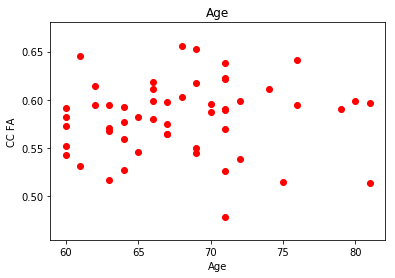

In [5]:
plt.scatter(oa_df['age'], oa_df['CC_FA'], color = 'red')
plt.xlabel("Age")
plt.ylabel("CC FA")
plt.title("Age")

### Young Adults

In [66]:
ya_files = pd.DataFrame(os.listdir(home_dir + '/tbss_young_1/origdata'), columns = ['files'])
ya_cc = pd.read_csv(home_dir + '/tbss_young_1/stats/meants_cc.txt', names = ['CC_FA'])
ya_df1 = pd.concat([ya_files, ya_cc], axis = 1)
ya_df1[0:5]

,files,CC_FA
0,sub-30085_dti_FA.nii.gz,0.610031
1,sub-30012_dti_FA.nii.gz,0.590609
2,sub-30236_dti_FA.nii.gz,0.633003
3,sub-30403_dti_FA.nii.gz,0.617689
4,sub-30096_dti_FA.nii.gz,0.614667


In [73]:
ya_df1['record_id1'] = ya_df1['files'].str.split('-', expand = True)[1]
ya_df1['record_id'] = ya_df1['record_id1'].str.split('_', expand = True)[0].astype(int)
ya_df1[0:5]

,files,CC_FA,record_id1,record_id
0,sub-30085_dti_FA.nii.gz,0.610031,30085_dti_FA.nii.gz,30085
1,sub-30012_dti_FA.nii.gz,0.590609,30012_dti_FA.nii.gz,30012
2,sub-30236_dti_FA.nii.gz,0.633003,30236_dti_FA.nii.gz,30236
3,sub-30403_dti_FA.nii.gz,0.617689,30403_dti_FA.nii.gz,30403
4,sub-30096_dti_FA.nii.gz,0.614667,30096_dti_FA.nii.gz,30096


In [100]:
ya_df = pd.merge(ya_df1, beh, on = 'record_id', how = 'right')
ya_df = ya_df.dropna(subset = ['files'])
ya_df[0:5]

,files,CC_FA,record_id1,record_id,age,sex,years_educ,IS,IV,RA,...,cvlt_recognition_fp_zscore,cvlt_zscore,vc_zscore,ds_zscore,stoop_i_zscore,cowat_zscore,trails_a_z_score,trails_b_z_score,time_trails_b,ds_backward_score
0,sub-30085_dti_FA.nii.gz,0.610031,30085_dti_FA.nii.gz,30085,19,Female,14.0,0.54,0.59,0.89,...,NaN,NaN,1.00,0.33,NaN,NaN,1.154294,1.494878,30.0,8.0
1,sub-30012_dti_FA.nii.gz,0.590609,30012_dti_FA.nii.gz,30012,30,Male,21.0,0.34,1.18,0.94,...,NaN,NaN,1.00,1.67,NaN,NaN,-1.216992,-0.268608,54.0,15.0
2,sub-30236_dti_FA.nii.gz,0.633003,30236_dti_FA.nii.gz,30236,24,Female,16.0,0.31,1.32,0.95,...,NaN,NaN,2.00,0.33,NaN,NaN,-0.737991,-0.396375,54.0,8.0
3,sub-30403_dti_FA.nii.gz,0.617689,30403_dti_FA.nii.gz,30403,18,Male,12.0,0.40,0.74,0.83,...,NaN,NaN,0.67,-0.33,NaN,NaN,0.572052,0.943262,37.0,6.0
4,sub-30096_dti_FA.nii.gz,0.614667,30096_dti_FA.nii.gz,30096,19,Female,13.0,0.35,0.93,0.68,...,NaN,NaN,2.00,0.33,NaN,NaN,0.426492,1.337273,32.0,11.0


In [101]:
ya_df.describe()

,CC_FA,record_id,age,years_educ,IS,IV,RA,actamp,actbeta,actphi,...,cvlt_recognition_fp_zscore,cvlt_zscore,vc_zscore,ds_zscore,stoop_i_zscore,cowat_zscore,trails_a_z_score,trails_b_z_score,time_trails_b,ds_backward_score
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,39.000000,39.000000,39.000000,...,0.0,0.0,46.000000,46.000000,0.0,0.0,46.000000,46.000000,46.000000,45.000000
mean,0.596623,30218.108696,21.521739,14.239130,0.390870,0.913261,0.831304,1.646618,6.489322,16.341834,...,NaN,NaN,1.419783,0.397609,NaN,NaN,-0.247918,-0.304770,53.195652,9.244444
std,0.023018,187.847601,3.799059,1.982532,0.109419,0.245728,0.154051,0.234903,2.611702,1.377225,...,NaN,NaN,0.900300,1.013285,NaN,NaN,1.086054,1.286478,16.389183,2.337010
min,0.525539,30004.000000,18.000000,12.000000,0.030000,0.460000,0.170000,1.000000,1.930790,13.837110,...,NaN,NaN,-1.330000,-1.670000,NaN,NaN,-4.776119,-5.597321,30.000000,5.000000
25%,0.589993,30066.750000,19.000000,13.000000,0.315000,0.740000,0.822500,1.518578,5.013879,15.413615,...,NaN,NaN,1.000000,-0.247500,NaN,NaN,-0.576355,-0.860629,42.000000,8.000000
50%,0.600079,30123.500000,20.000000,14.000000,0.405000,0.915000,0.890000,1.610770,6.198216,16.267490,...,NaN,NaN,1.330000,0.330000,NaN,NaN,-0.112318,-0.253690,53.000000,9.000000
75%,0.609760,30390.250000,23.750000,16.000000,0.450000,1.057500,0.927500,1.899808,7.514651,17.072885,...,NaN,NaN,2.000000,1.247500,NaN,NaN,0.426492,0.683712,60.000000,11.000000
max,0.633003,30588.000000,30.000000,21.000000,0.580000,1.580000,0.970000,2.047120,12.659668,19.581603,...,NaN,NaN,3.000000,3.000000,NaN,NaN,1.154294,1.494878,120.000000,15.000000


Text(0.5, 1.0, 'Age')

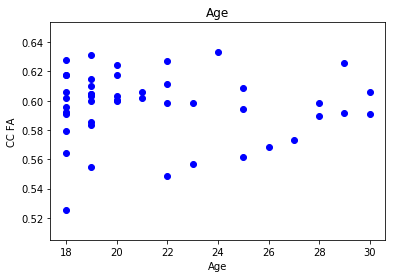

In [75]:
plt.scatter(ya_df['age'], ya_df['CC_FA'], color = 'blue')
plt.xlabel("Age")
plt.ylabel("CC FA")
plt.title("Age")

## Plots

Text(0.5, 1.0, 'Interdaily Stability')

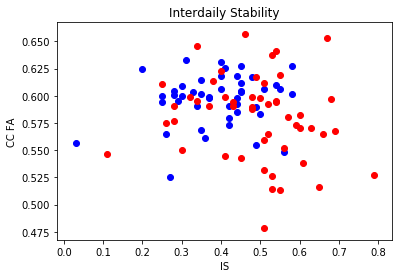

In [76]:
plt.scatter(ya_df['IS'], ya_df['CC_FA'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df['IS'], oa_df['CC_FA'], color = 'red', label = 'Older Adults')
plt.xlabel("IS")
plt.ylabel("CC FA")
plt.title("Interdaily Stability")

Text(0.5, 1.0, 'Intradaily Variability')

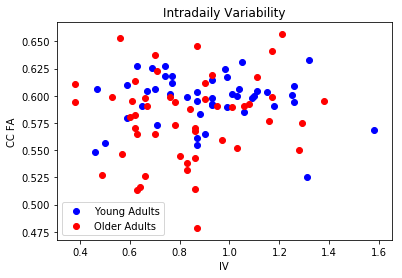

In [77]:
plt.scatter(ya_df['IV'], ya_df['CC_FA'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df['IV'], oa_df['CC_FA'], color = 'red', label = 'Older Adults')
plt.xlabel("IV")
plt.ylabel("CC FA")
plt.legend()
plt.title("Intradaily Variability")

Text(0.5, 1.0, 'Relative Amplitude')

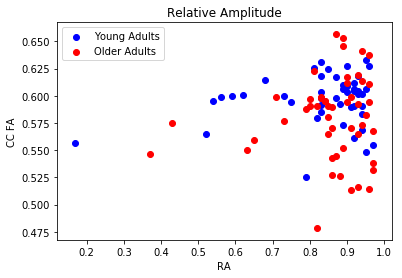

In [78]:
plt.scatter(ya_df['RA'], ya_df['CC_FA'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df['RA'], oa_df['CC_FA'], color = 'red', label = 'Older Adults')
plt.xlabel("RA")
plt.ylabel("CC FA")
plt.legend()
plt.title("Relative Amplitude")

Text(0.5, 1.0, 'Up-Mesor')

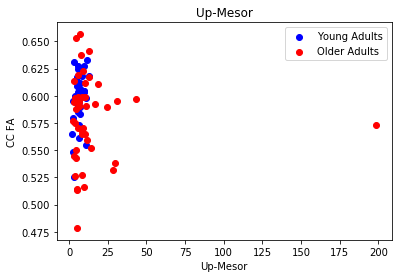

In [83]:
plt.scatter(ya_df['actbeta'], ya_df['CC_FA'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df['actbeta'], oa_df['CC_FA'], color = 'red', label = 'Older Adults')
plt.xlabel("Up-Mesor")
plt.ylabel("CC FA")
plt.legend()
plt.title("Up-Mesor")

Text(0.5, 1.0, 'Duration of Peak Activity')

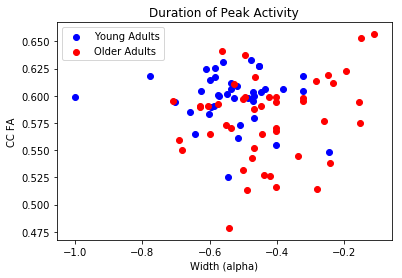

In [79]:
plt.scatter(ya_df['actalph'], ya_df['CC_FA'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df['actalph'], oa_df['CC_FA'], color = 'red', label = 'Older Adults')
plt.xlabel("Width (alpha)")
plt.ylabel("CC FA")
plt.legend()
plt.title("Duration of Peak Activity")

Text(0.5, 1.0, 'Robustness')

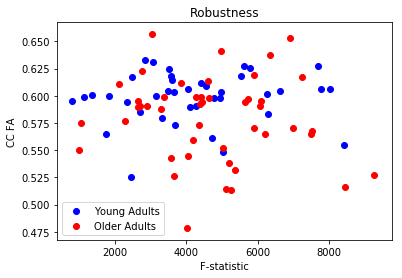

In [80]:
plt.scatter(ya_df['fact'], ya_df['CC_FA'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df['fact'], oa_df['CC_FA'], color = 'red', label = 'Older Adults')
plt.xlabel("F-statistic")
plt.ylabel("CC FA")
plt.legend()
plt.title("Robustness")

In [15]:
bmi = pd.read_csv('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/data/Redcap/bmi.csv').dropna().reset_index()
bmi[0:5]

,index,sub_id,height_mri,weight_mri
0,3,30012.0,"5'3""",100.0
1,8,30015.0,"5'7""",100.0
2,9,30019.0,"5'3""",130.0
3,10,30020.0,"5'1""",132.0
4,11,30023.0,"5'11""",150.0


In [16]:
def calculate_bmi(data, i):
    #print(bmi['sub_id'].iloc[i])
    
    feet = float(bmi['height_mri'].iloc[i].split("\'")[0])*12
    inches = float(bmi['height_mri'].iloc[i].split("\'")[1].split('"')[0])
    height = feet + inches
    weight = float(bmi['weight_mri'].iloc[i])
    
    body_mass_index = round( (weight * 703) / (height ** 2) , 2)
    
    return body_mass_index

In [17]:
body_mass_index = []

for i in bmi.index:
    
    body_mass_index.append(calculate_bmi(bmi, i))

body_mass_index = pd.DataFrame(body_mass_index, columns = ['bmi'])
bmi_df = pd.concat([bmi, body_mass_index], axis = 1).reset_index().drop(columns = ['level_0', 'index'])
bmi_df[0:5]

,sub_id,height_mri,weight_mri,bmi
0,30012.0,"5'3""",100.0,17.71
1,30015.0,"5'7""",100.0,15.66
2,30019.0,"5'3""",130.0,23.03
3,30020.0,"5'1""",132.0,24.94
4,30023.0,"5'11""",150.0,20.92


In [18]:
oa_df_n = oa_df.merge(bmi_df[bmi_df['sub_id'] > 40000], left_on = 'record_id', right_on = 'sub_id', how = 'right')
ya_df_n = ya_df.merge(bmi_df[bmi_df['sub_id'] < 40000], left_on = 'record_id', right_on = 'sub_id', how = 'right')

Some of these values aren't right (eg. > 200)

Text(0.5, 1.0, 'BMI vs CC FA')

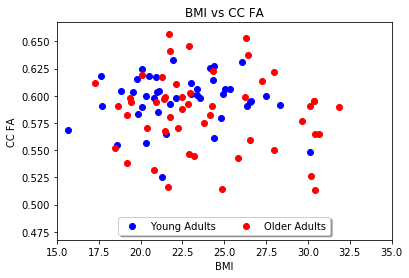

In [19]:
plt.scatter(ya_df_n['bmi'], ya_df_n['CC_FA'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df_n['bmi'], oa_df_n['CC_FA'], color = 'red', label = 'Older Adults')
plt.xlim([15, 35])
plt.xlabel("BMI")
plt.ylabel("CC FA")
plt.legend(loc='lower center', shadow=True, ncol=2)
plt.title("BMI vs CC FA")

Text(0.5, 1.0, 'BMI vs Duration of Peak Activity')

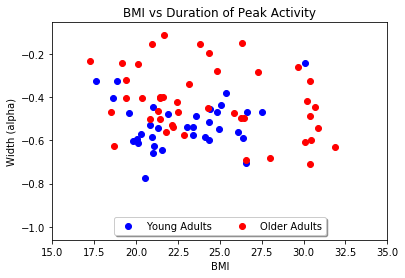

In [20]:
plt.scatter(ya_df_n['bmi'], ya_df_n['actalph'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df_n['bmi'], oa_df_n['actalph'], color = 'red', label = 'Older Adults')
plt.xlim([15, 35])
plt.xlabel("BMI")
plt.ylabel("Width (alpha)")
plt.legend(loc='lower center', shadow=True, ncol=2)
plt.title("BMI vs Duration of Peak Activity")

In [7]:
oa_dsn = oa_df.drop(['files', 'record_id', 'CC_FA'], axis = 1)
oa_dsn.mean()

age                     67.962264
trails_b_z_score         0.145255
IS                       0.493913
IV                       0.841739
RA                       0.860652
actamp                   1.542622
actbeta                 14.261290
actphi                  14.785759
actmin                   0.150845
actmesor                 0.922156
actupmesor               7.068573
actdownmesor            22.502944
actalph                 -0.428420
actwidthratio            0.643099
rsqact                   0.377278
fact                  4711.720788
Executive function       0.344416
dtype: float64

In [8]:
oa_dsn.isnull().sum()

age                   0
trails_b_z_score      2
IS                    7
IV                    7
RA                    7
actamp                7
actbeta               7
actphi                7
actmin                7
actmesor              7
actupmesor            7
actdownmesor          7
actalph               7
actwidthratio         7
rsqact                7
fact                  7
Executive function    0
dtype: int64

In [11]:
oa_imp = oa_dsn.fillna(oa_dsn.mean())
oa_dem = oa_imp - oa_dsn.mean()
oa_dem[0:5]

,age,trails_b_z_score,IS,IV,RA,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,rsqact,fact,Executive function
0,13.037736,-0.025115,0.186087,0.058261,-0.060652,0.018326,28.717525,0.828476,0.204960,0.214123,0.538048,1.118903,-0.073304,0.024202,0.060640,1013.871302,-0.705433
1,-6.962264,0.154906,0.016087,-0.011739,0.109348,0.007254,13.864761,0.906291,0.020221,0.023848,0.615870,1.196712,-0.073302,0.024202,0.044782,655.118149,-0.032747
2,-0.962264,-3.139885,-0.233913,0.448261,-0.430652,-0.542622,-10.338641,-0.707232,0.633778,0.362468,0.416526,-1.830991,0.273687,-0.093647,-0.253950,-3677.888455,0.028280
3,-1.962264,0.082457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.271290
4,-5.962264,0.692830,0.046087,-0.461739,0.099348,0.463541,-11.201454,-0.935152,-0.150845,0.080926,0.185721,-2.056024,0.272940,-0.093406,0.057370,938.257688,0.630607


In [43]:
ya_dsn = ya_df.drop(['files', 'record_id', 'CC_FA'], axis = 1)
ya_dsn.mean()

age                     21.583333
trails_b_z_score        -0.356197
IS                       0.397436
IV                       0.904872
RA                       0.837179
actamp                   1.646618
actbeta                  6.489322
actphi                  16.341834
actmin                   0.108939
actmesor                 0.932248
actupmesor               8.279366
actdownmesor            24.404302
actalph                 -0.534464
actwidthratio            0.671872
rsqact                   0.349329
fact                  4216.457899
Executive function       0.584791
dtype: float64

In [45]:
ya_dsn.isnull().sum()

age                   0
trails_b_z_score      0
IS                    9
IV                    9
RA                    9
actamp                9
actbeta               9
actphi                9
actmin                9
actmesor              9
actupmesor            9
actdownmesor          9
actalph               9
actwidthratio         9
rsqact                9
fact                  9
Executive function    0
dtype: int64

In [41]:
ya_imp = ya_dsn.fillna(ya_dsn.mean())
ya_dem = ya_imp - ya_dsn.mean()
ya_dem[0:5]

,age,trails_b_z_score,IS,IV,RA,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,rsqact,fact,Executive function
0,-2.583333,1.851075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.379358
1,8.416667,0.087589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658883
2,2.416667,-0.040178,-0.087436,0.415128,0.112821,-0.356334,4.906917,-2.504724,0.030149,-0.148018,-2.339523,-2.669925,0.057936,-0.013767,-0.071046,-1371.239473,0.002815
3,-3.583333,1.299459,0.002564,-0.164872,-0.007179,0.079188,6.170346,-2.286538,-0.026192,0.013402,-3.617901,-0.955176,-0.241663,0.110947,-0.024194,-661.422042,-0.218905
4,-2.583333,1.693470,-0.047436,0.025128,-0.157179,0.253457,-2.151464,1.570391,-0.108939,0.017790,1.172340,1.968441,-0.066063,0.033171,-0.021051,-610.268729,0.679750


In [52]:
ya_dem['IS'].size

48

Missing a lot of rest-activity measures - why?

In [63]:
np.savetxt(home_dir + '/tbss_old_1/stats/design_IS_0218.txt', oa_dem['IS'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_old_1/stats/design_IV_0218.txt', oa_dem['IV'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_old_1/stats/design_RA_0218.txt', oa_dem['RA'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_old_1/stats/design_alpha_0218.txt', oa_dem['actalph'].values, fmt = '%f')

In [64]:
oa_dem['IS'].values

array([ 0.18608696,  0.01608696, -0.23391304,  0.        ,  0.04608696,
        0.        ,  0.19608696,  0.        , -0.00391304,  0.00608696,
        0.16608696,  0.02608696, -0.19391304,  0.17608696, -0.09391304,
        0.04608696, -0.01391304,  0.02608696, -0.11391304, -0.08391304,
        0.        ,  0.01608696,  0.        , -0.21391304, -0.12391304,
       -0.24391304,  0.05608696,  0.09608696,  0.01608696, -0.17391304,
       -0.04391304, -0.01391304,  0.        ,  0.03608696,  0.        ,
       -0.15391304,  0.05608696,  0.03608696, -0.06391304, -0.21391304,
        0.10608696,  0.29608696, -0.08391304, -0.01391304, -0.06391304,
       -0.03391304,  0.01608696,  0.13608696,  0.04608696,  0.03608696,
        0.15608696,  0.06608696,  0.11608696])

In [65]:
np.savetxt(home_dir + '/tbss_young_1/stats/design_IS_0218.txt', ya_dem['IS'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_young_1/stats/design_IV_0218.txt', ya_dem['IV'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_young_1/stats/design_RA_0218.txt', ya_dem['RA'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_young_1/stats/design_alpha_0218.txt', ya_dem['actalph'].values, fmt = '%f')

## New design matrices

In [17]:
np.stack([np.ones(oa_dem['IS'].size), oa_dem['IS']], axis = 1)[0:5]

array([[ 1.        ,  0.18608696],
       [ 1.        ,  0.01608696],
       [ 1.        , -0.23391304],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.04608696]])

In [19]:
np.savetxt(home_dir + '/tbss_old_1/stats/design_1IS_0218.txt', np.stack([np.ones(oa_dem['IS'].size), oa_dem['IS']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_old_1/stats/design_1IV_0218.txt', np.stack([np.ones(oa_dem['IV'].size), oa_dem['IV']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_old_1/stats/design_1RA_0218.txt', np.stack([np.ones(oa_dem['RA'].size), oa_dem['RA']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_old_1/stats/design_1alpha_0218.txt', np.stack([np.ones(oa_dem['actalph'].size), oa_dem['actalph']], axis = 1), fmt = '%f')
